##**Introduction**
      In this priject,we will examine the data and build different **machine learning models** that will detect if the mushroom is **edible or poisonous** by its specification like cap shape , cap color, gill color, ete.using different classifiers.



##**Importing important libraries**

In [ ]:
#importing libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###**Unzipping the Dataset**

In [ ]:
#importing the zip file of the dataset

import zipfile as z
zip_ref = z.ZipFile("/content/archive (1).zip","r")
zip_ref.extractall("/content/")
zip_ref.close()

##**Loading and Reading the CSV file of the dataset**

In [ ]:
#importing dataset and read the dataset

df=pd.read_csv("/content/mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


##**Data Analysis & Data Visualization**

In [ ]:
#reviewing the shape of the dataset

df.shape

(8124, 23)

**This says that the dataset has 8124 rows and 23 columns. Sumply meaning,there are 8124 data points in the dataset and there are 23 features,one of them target feature.**

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

##**Out of these features,the features'class is the target feature**

In [ ]:
#checking for null values

df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**This dataset has no missing values. It is good for us**

In [ ]:
#checking type of feaures
#The .info() method will give us a concise summary of the dataset.Including the indexdtype and column dtype , and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##**There are 23 object type which the model can not understand. So thet need to be  labelEncoder**

In [ ]:
#taking care of categorical values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  df[i]=le.fit_transform(df[i])
  

In [ ]:
#This method will give us the first 10 rows of the dataset.

df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,3,3


In [ ]:
# dropping unneccssary features

df.drop(['veil-type'],axis=1, inplace=True)

#Another observation is that we do not need to use the feature'veil-type'.So we will simply drop it.

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


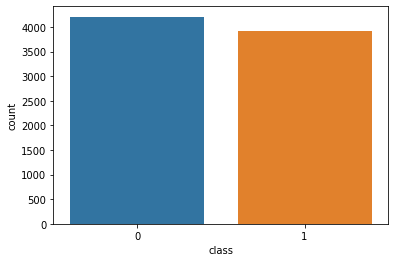

In [ ]:
sns.countplot(x='class',data=df)

##**Almost 4200 is edible(0) and Around 3900is poisonous(1)**



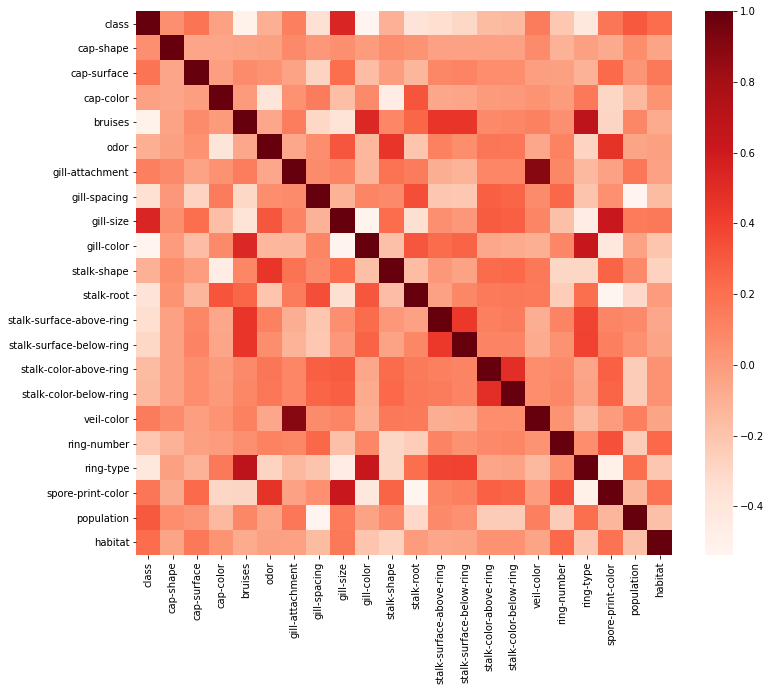

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='Reds')

##**some of the columns are correlated**

##**Building the Model**

In [ ]:
#defining dependent and independent variables

x=df.drop('class',axis=1)
y=df['class']

In [ ]:
#spliting data into training and testting set

from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

##**Logistic Regression**

In [ ]:
#logistic Regression
#trining model


from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr= lr.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

act=accuracy_score(y_train,lr.predict(X_train))
print('Training Accuracy is:',(act*100))
p=precision_score(y_train,lr.predict(X_train))
print('Training Preision is:',(p*100))
r= recall_score(y_train,lr.predict(X_train))
print('Training Recall is:',(r*100))
f= f1_score(y_train,lr.predict(X_train))
print('Training F1 Score is:',(f*100))


Training Accuracy is: 95.14597256419275
Training Preision is: 95.41116005873715
Training Recall is: 94.50909090909092
Training F1 Score is: 94.9579831932773


In [ ]:
act=accuracy_score(y_test,lr.predict(x_test))
print('Test Accuracy is:',(act*100))
p=precision_score(y_test,lr.predict(x_test))
print('Test Preision is:',(p*100))
r= recall_score(y_test,lr.predict(x_test))
print('Test Recall is:',(r*100))
f= f1_score(y_test,lr.predict(x_test))
print('Test F1 Score is:',(f*100))


Test Accuracy is: 94.91386382280558
Test Preision is: 95.6217162872154
Test Recall is: 93.65351629502572
Test F1 Score is: 94.62738301559791


##**RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features=0.5, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
rf = rf.fit(X_train,y_train)

In [ ]:
act = accuracy_score(y_train,rf.predict(X_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,rf.predict(X_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,rf.predict(X_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,rf.predict(X_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  100.0
Training Precision is:  100.0
Training Recall is:  100.0
Training F1 Score is:  100.0


In [ ]:
act = accuracy_score(y_test,rf.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,rf.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,rf.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,rf.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  100.0
Test Precision is:  100.0
Test Recall is:  100.0
Test F1 Score is:  100.0


##**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt=dt.fit(X_train, y_train)

In [ ]:
act = accuracy_score(y_train,dt.predict(X_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,dt.predict(X_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,dt.predict(X_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,dt.predict(X_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  100.0
Training Precision is:  100.0
Training Recall is:  100.0
Training F1 Score is:  100.0


In [ ]:
act = accuracy_score(y_test,dt.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,dt.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,dt.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,dt.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  100.0
Test Precision is:  100.0
Test Recall is:  100.0
Test F1 Score is:  100.0


**Since Random Forest Classifier and Decision Tree Classifier both are perfoms good.So any of them  will be chosen as the final model.**